In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

In [48]:
cc = pd.read_csv('C:\\Users\\Richard\\Desktop\\DM_proj\\credit_default_FINAL.csv')

In [49]:
cc.head()

,limit,sex,education,status,age,ps-sep,ps-aug,ps-jul,ps-jun,ps-may,...,ba-jun,ba-may,ba-apr,pa-sep,pa-aug,pa-jul,pa-jun,pa-may,pa-apr,credit_default
0,50000,male,graduate school,single,25.0,2,0,0,0,0,...,49535,30358,30302,2130,1905,1811,1100,1100,1200,no
1,200000,male,university,married,54.0,-1,-1,-1,-1,-1,...,6335,4616,7956,10120,7852,6336,4622,7956,5499,no
2,30000,female,high school,married,41.0,2,3,2,2,2,...,30496,29731,29047,0,1700,1100,3,1053,1303,no
3,140000,female,university,single,28.0,0,0,0,0,0,...,25224,26855,23783,2000,2000,900,2000,10000,5000,no
4,60000,female,high school,married,36.0,1,2,2,0,0,...,48738,49601,52773,1788,0,1894,1801,3997,0,yes


In [50]:
sexes = sorted(cc['sex'].unique())
educations = sorted(cc['education'].unique())
statuses = sorted(cc['status'].unique()) 
cre_def = sorted(cc['credit_default'].unique()) 

sexes_mapping = dict(zip(sexes, range(0, len(sexes) + 1)))
educations_mapping = dict(zip(educations, range(0, len(educations) + 1)))
statuses_mapping = dict(zip(statuses, range(0, len(statuses) + 1)))
cre_def_mapping = dict(zip(cre_def, range(0, len(cre_def) + 1)))

print(sexes_mapping)
print(educations_mapping)
print(statuses_mapping)
print(cre_def_mapping)

{'female': 0, 'male': 1}
{'graduate school': 0, 'high school': 1, 'others': 2, 'university': 3}
{'married': 0, 'others': 1, 'single': 2}
{'no': 0, 'yes': 1}


In [51]:
cc['sex_Val'] = cc['sex'].map(sexes_mapping).astype(int)
cc['edu_Val'] = cc['education'].map(educations_mapping).astype(int)
cc['sta_Val'] = cc['status'].map(statuses_mapping).astype(int)
cc['crd_Val'] = cc['credit_default'].map(cre_def_mapping).astype(int)

In [52]:
sex, edu, statu, credit_default = cc['sex'], cc['education'], cc['status'], cc['credit_default']
del cc['sex']
del cc['education']
del cc['status']
del cc['credit_default']
cc.head()

,limit,age,ps-sep,ps-aug,ps-jul,ps-jun,ps-may,ps-apr,ba-sep,ba-aug,...,pa-sep,pa-aug,pa-jul,pa-jun,pa-may,pa-apr,sex_Val,edu_Val,sta_Val,crd_Val
0,50000,25.0,2,0,0,0,0,0,48966,49985,...,2130,1905,1811,1100,1100,1200,1,0,2,0
1,200000,54.0,-1,-1,-1,-1,-1,-1,10755,9981,...,10120,7852,6336,4622,7956,5499,1,3,0,0
2,30000,41.0,2,3,2,2,2,0,30057,29280,...,0,1700,1100,3,1053,1303,0,1,0,0
3,140000,28.0,0,0,0,0,0,0,56426,41717,...,2000,2000,900,2000,10000,5000,0,3,2,0
4,60000,36.0,1,2,2,0,0,0,47987,48716,...,1788,0,1894,1801,3997,0,0,1,0,1


In [53]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [54]:
scaler = StandardScaler()
scaler.fit(cc.head().values)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [55]:
cc.head().values

array([[ 5.0000e+04,  2.5000e+01,  2.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  4.8966e+04,  4.9985e+04,
         5.0760e+04,  4.9535e+04,  3.0358e+04,  3.0302e+04,  2.1300e+03,
         1.9050e+03,  1.8110e+03,  1.1000e+03,  1.1000e+03,  1.2000e+03,
         1.0000e+00,  0.0000e+00,  2.0000e+00,  0.0000e+00],
       [ 2.0000e+05,  5.4000e+01, -1.0000e+00, -1.0000e+00, -1.0000e+00,
        -1.0000e+00, -1.0000e+00, -1.0000e+00,  1.0755e+04,  9.9810e+03,
         7.8430e+03,  6.3350e+03,  4.6160e+03,  7.9560e+03,  1.0120e+04,
         7.8520e+03,  6.3360e+03,  4.6220e+03,  7.9560e+03,  5.4990e+03,
         1.0000e+00,  3.0000e+00,  0.0000e+00,  0.0000e+00],
       [ 3.0000e+04,  4.1000e+01,  2.0000e+00,  3.0000e+00,  2.0000e+00,
         2.0000e+00,  2.0000e+00,  0.0000e+00,  3.0057e+04,  2.9280e+04,
         3.0206e+04,  3.0496e+04,  2.9731e+04,  2.9047e+04,  0.0000e+00,
         1.7000e+03,  1.1000e+03,  3.0000e+00,  1.0530e+03,  1.3030e+03,
  

In [56]:
scaler.transform(cc.head().values)

array([[-0.71804912, -1.1452533 ,  1.02899151, -0.54433105, -0.5       ,
        -0.20412415, -0.20412415,  0.5       ,  0.61377694,  0.94203533,
         0.95200026,  1.08571212,  0.14861646,  0.10624326, -0.30429327,
        -0.2932583 , -0.29834118, -0.52710698, -1.02912734, -0.63178057,
         1.22474487, -1.33333333,  1.22474487, -0.5       ],
       [ 1.62341541,  1.66935227, -1.54348727, -1.22474487, -1.33333333,
        -1.22474487, -1.22474487, -2.        , -1.70193137, -1.74033672,
        -1.78875556, -1.59914046, -1.65102832, -1.4456667 ,  1.95192724,
         1.92445167,  1.96219771,  1.77849509,  0.86695378,  1.30768291,
         1.22474487,  1.16666667, -0.81649658, -0.5       ],
       [-1.03024439,  0.40763253,  1.02899151,  1.4969104 ,  1.16666667,
         1.83711731,  1.83711731,  0.5       , -0.53216869, -0.44628867,
        -0.36061467, -0.09754964,  0.10478236,  0.01908462, -0.90576382,
        -0.36970534, -0.65353303, -1.2452346 , -1.04212556, -0.58531284,
  

In [57]:
scaler.inverse_transform(scaler.transform(cc.head().values))

array([[ 5.0000e+04,  2.5000e+01,  2.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  4.8966e+04,  4.9985e+04,
         5.0760e+04,  4.9535e+04,  3.0358e+04,  3.0302e+04,  2.1300e+03,
         1.9050e+03,  1.8110e+03,  1.1000e+03,  1.1000e+03,  1.2000e+03,
         1.0000e+00,  0.0000e+00,  2.0000e+00,  0.0000e+00],
       [ 2.0000e+05,  5.4000e+01, -1.0000e+00, -1.0000e+00, -1.0000e+00,
        -1.0000e+00, -1.0000e+00, -1.0000e+00,  1.0755e+04,  9.9810e+03,
         7.8430e+03,  6.3350e+03,  4.6160e+03,  7.9560e+03,  1.0120e+04,
         7.8520e+03,  6.3360e+03,  4.6220e+03,  7.9560e+03,  5.4990e+03,
         1.0000e+00,  3.0000e+00,  0.0000e+00,  0.0000e+00],
       [ 3.0000e+04,  4.1000e+01,  2.0000e+00,  3.0000e+00,  2.0000e+00,
         2.0000e+00,  2.0000e+00,  0.0000e+00,  3.0057e+04,  2.9280e+04,
         3.0206e+04,  3.0496e+04,  2.9731e+04,  2.9047e+04,  0.0000e+00,
         1.7000e+03,  1.1000e+03,  3.0000e+00,  1.0530e+03,  1.3030e+03,
  

In [58]:
scaler = MinMaxScaler()
X = scaler.fit_transform(cc.values)

In [59]:
X[:5]

array([[5.19480519e-02, 7.40740741e-02, 4.00000000e-01, 2.22222222e-01,
        2.00000000e-01, 2.00000000e-01, 2.00000000e-01, 2.00000000e-01,
        1.00839480e-01, 1.77236133e-01, 1.70378543e-01, 1.15166914e-01,
        5.85922571e-02, 6.07923152e-02, 6.59414143e-03, 4.90819991e-03,
        4.33681044e-03, 3.75475318e-03, 3.62423891e-03, 2.70879750e-03,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.46753247e-01, 6.11111111e-01, 1.00000000e-01, 1.11111111e-01,
        1.00000000e-01, 1.00000000e-01, 1.00000000e-01, 1.00000000e-01,
        4.00177637e-02, 1.18034097e-01, 1.05246304e-01, 4.77868294e-02,
        1.50619422e-02, 2.18063753e-02, 3.13299114e-02, 2.02305437e-02,
        1.51728498e-02, 1.57767902e-02, 2.62131316e-02, 1.24130645e-02,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.59740260e-02, 3.70370370e-01, 4.00000000e-01, 5.55555556e-01,
        4.00000000e-01, 4.00000000e-01, 4.00000000e-01, 2.0000

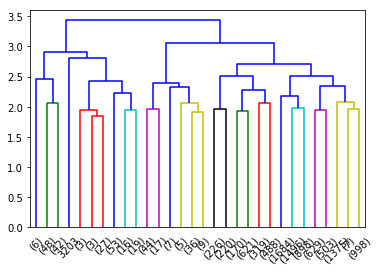

In [62]:
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, color_threshold=2.1, truncate_mode='lastp')

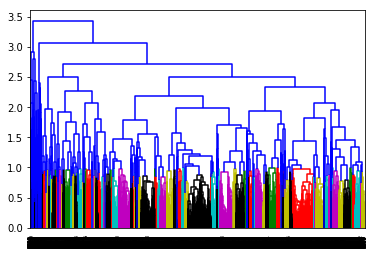

In [61]:
res = dendrogram(data_link, color_threshold=1.0)

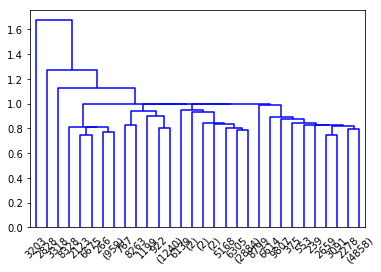

In [63]:
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='single', metric='euclidean')
res = dendrogram(data_link, color_threshold=0.2, truncate_mode='lastp')

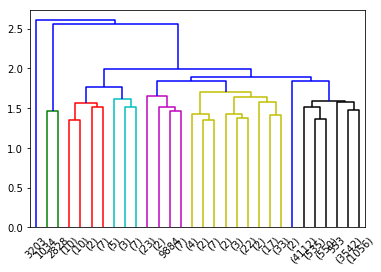

In [65]:
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='average', metric='euclidean')
res = dendrogram(data_link, color_threshold=1.75, truncate_mode='lastp')